# Telecome Prepaid Plan Analysis

I work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, **Surf** and **Ultimate**. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
I am are going to carry out a preliminary analysis of the plans based on a relatively small client selection. I'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. My job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

**Prepaid Plans**

**Surf**
- Monthly charge: \$20
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: \$10
    
**Ultimate**
- Monthly charge: \$70
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: \$7

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import matplot
import matplotlib.pyplot as plt
from datetime import datetime
import re
# hypothesis testing
from scipy import stats as st

## Open the data file and study the general information

### Open Datasets

In [2]:
try: 
    # import calls
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    # import internet
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    # import messages
    msgs = pd.read_csv('/datasets/megaline_messages.csv')
    # import plans
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    # import users
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    print('Somethong went wrong.')
else:
    print("Read the data successfully. ")

Read the data successfully. 


### General Informations

#### Calls

In [3]:
# check the first 5 rows of calls dataframe
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
# check the last 5 rows of calss dataframe
calls.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


In [5]:
# the information of calls dataframe
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# check the statistics of calls dataframe
calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

The maximum duration is 37 minutes, and minimum is 0, we know 0 means the calls weren't connected. 

In [7]:
# check the number of columns and rows of calls dataframe
calls.shape

(137735, 4)

There are 137735 rows and 4 columns

In [8]:
# check for the missing values
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

There is no missing values in calls dataset.

In [9]:
# check for duplicates
calls.duplicated().sum()

0

There is no duplicated data in calls.

#### Internet

In [10]:
# check the first 5 rows of internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
# check the last 5 rows of internet
internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [12]:
# check the information of internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [13]:
# check the statistics of internet
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

The minimum internet usage is 0Mb and maximum is 1693 MB.

In [14]:
# check the number of rows and columns of internet 
internet.shape

(104825, 4)

There are 104825 rows and 4 columns

In [15]:
# check if there exist missing values in internet
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

There isn't exist any missing values.

In [16]:
# check if there exist duplicate values in internet
internet.duplicated().sum()

0

There is no duplicated data in internet.

#### Messages

In [17]:
# check the first 5 rows of messages
msgs.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
# check the last 5 rows of messages
msgs.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [19]:
# check the general information of messages
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# check the number of rows and columns of messages
msgs.shape

(76051, 3)

There are 76051 rows and 3 columns in messages dataset. 

In [21]:
# check missing values in messages
msgs.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

No missing values in messages dataset.

In [22]:
# check for duplicate values in messages
msgs.duplicated().sum()

0

No duplicates in messages.

#### Users

In [23]:
# check the first 5 rows of users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [24]:
# check the last 5 rows of users
users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


In [25]:
# check for general information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
# check for general statistics 
users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

As the 50% percentile of age is close to the mean value, and the maximum age matches the real-world situation, we know there isn't outliers in users dataset.

In [27]:
# check for number of rows and columns in users dataset.
users.shape

(500, 8)

There are 500 rows and 8 columns of users.

In [28]:
# check for missing values
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

There exist missing values in users dataset, specifically, only exist in 'churn_date' column.

In [29]:
# check for duplicate values
users.duplicated().sum()

0

There is no duplicate.

#### Plans

In [30]:
# check the first 5 rows of plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [31]:
# check the last 5 rows of plans
plans.tail()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We only have two rows in Plan dataset.

#### Conclusion

We noticed all the date time column are in object datatype, we need to convert them to datetime format, and add year, month, day of week to the dataset. We also found that there are large portion of missing value in 'churn_date' column from users. We need to do more analysis about this. Moreover, all the float data need to convert to integers.

## Data Preparation and Calculation

### Preparation

In [32]:
# get our users' real id from 'id' column
real_id = np.vectorize(lambda x: re.sub('.*_', '' ,  x))

#### Calls Data

In [33]:
# We need to change 'call_date' column to datetime format, and add year, day of week, and month column to the data
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d', errors='raise')
calls['dow'] = calls['call_date'].dt.day_name()
calls['month'] = calls['call_date'].dt.month_name()
calls['year'] = calls['call_date'].dt.year

In [34]:
# We need to change datatype for 'duration' to integers.
calls['duration'] = calls['duration'].astype('int64')

In [35]:
calls['duration'].describe()

count    137735.000000
mean          6.349991
std           5.731871
min           0.000000
25%           1.000000
50%           5.000000
75%          10.000000
max          37.000000
Name: duration, dtype: float64

We noticed the minimume duration time is 0, means the phone calls were not connect. 

In [36]:
# We can add a new column that if duration is greater than 0, then it's 'connected', otherwise is 'missed'
calls['call_type'] = np.where(calls['duration'] == 0, 'missed', 'connected')
calls.head()

,id,user_id,call_date,duration,dow,month,year,call_type
0,1000_93,1000,2018-12-27,8,Thursday,December,2018,connected
1,1000_145,1000,2018-12-27,13,Thursday,December,2018,connected
2,1000_247,1000,2018-12-27,14,Thursday,December,2018,connected
3,1000_309,1000,2018-12-28,5,Friday,December,2018,connected
4,1000_380,1000,2018-12-30,4,Sunday,December,2018,connected


We noticed in the `id` column, the number before hyphen is `user_id`, so the real `id` is the number after hyphen.

In [37]:
# update the 'id' column
calls['id'] = real_id(calls['id'])
calls.head()

,id,user_id,call_date,duration,dow,month,year,call_type
0,93,1000,2018-12-27,8,Thursday,December,2018,connected
1,145,1000,2018-12-27,13,Thursday,December,2018,connected
2,247,1000,2018-12-27,14,Thursday,December,2018,connected
3,309,1000,2018-12-28,5,Friday,December,2018,connected
4,380,1000,2018-12-30,4,Sunday,December,2018,connected


#### Internet Data

In [38]:
# We need to change 'session_date' column to datetime format, and add year, day of week, and month column to the data
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d', errors = 'raise')
internet['dow'] = internet['session_date'].dt.day_name()
internet['month'] = internet['session_date'].dt.month_name()
internet['year'] = internet['session_date'].dt.year
internet.head()

,id,user_id,session_date,mb_used,dow,month,year
0,1000_13,1000,2018-12-29,89.86,Saturday,December,2018
1,1000_204,1000,2018-12-31,0.00,Monday,December,2018
2,1000_379,1000,2018-12-28,660.40,Friday,December,2018
3,1000_413,1000,2018-12-26,270.99,Wednesday,December,2018
4,1000_442,1000,2018-12-27,880.22,Thursday,December,2018


In [39]:
# We need to change datatype for 'mb_used' to integers.
internet['mb_used'] = internet['mb_used'].astype('int64')

In [40]:
internet['mb_used'].value_counts()

0       13829
303       169
408       161
319       161
265       157
        ...  
1375        1
1477        1
1541        1
1407        1
1535        1
Name: mb_used, Length: 1386, dtype: int64

We found there are 13829 users used 0 internet data, we cannot drop them because it's possible in real-life.

In [41]:
# We can add a new column that if 'mb_used' is greater than 0, then it's 'use_intnt', otherwise is 'not_use_intnt'
internet['type'] = np.where(internet['mb_used'] == 0, 'not_use_intnt', 'use_intnt')
internet.head()

,id,user_id,session_date,mb_used,dow,month,year,type
0,1000_13,1000,2018-12-29,89,Saturday,December,2018,use_intnt
1,1000_204,1000,2018-12-31,0,Monday,December,2018,not_use_intnt
2,1000_379,1000,2018-12-28,660,Friday,December,2018,use_intnt
3,1000_413,1000,2018-12-26,270,Wednesday,December,2018,use_intnt
4,1000_442,1000,2018-12-27,880,Thursday,December,2018,use_intnt


In [42]:
# update the 'id' column
internet['id'] = real_id(internet['id'])
internet.head()

,id,user_id,session_date,mb_used,dow,month,year,type
0,13,1000,2018-12-29,89,Saturday,December,2018,use_intnt
1,204,1000,2018-12-31,0,Monday,December,2018,not_use_intnt
2,379,1000,2018-12-28,660,Friday,December,2018,use_intnt
3,413,1000,2018-12-26,270,Wednesday,December,2018,use_intnt
4,442,1000,2018-12-27,880,Thursday,December,2018,use_intnt


#### Message Data

In [43]:
# We need to change 'message_date' column to datetime format, and add year, day of week, and month column to the data
msgs['message_date'] = pd.to_datetime(msgs['message_date'], format='%Y-%m-%d', errors='raise')
msgs['dow'] = msgs['message_date'].dt.day_name()
msgs['month'] = msgs['message_date'].dt.month_name()
msgs['year'] = msgs['message_date'].dt.year
msgs.head()

,id,user_id,message_date,dow,month,year
0,1000_125,1000,2018-12-27,Thursday,December,2018
1,1000_160,1000,2018-12-31,Monday,December,2018
2,1000_223,1000,2018-12-31,Monday,December,2018
3,1000_251,1000,2018-12-27,Thursday,December,2018
4,1000_255,1000,2018-12-26,Wednesday,December,2018


In [44]:
# update the 'id' column
msgs['id'] = real_id(msgs['id'])
msgs.head()

,id,user_id,message_date,dow,month,year
0,125,1000,2018-12-27,Thursday,December,2018
1,160,1000,2018-12-31,Monday,December,2018
2,223,1000,2018-12-31,Monday,December,2018
3,251,1000,2018-12-27,Thursday,December,2018
4,255,1000,2018-12-26,Wednesday,December,2018


#### Users Data

In [45]:
# We need to change 'reg_date' column to datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='raise')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [46]:
# missing values 
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

There are 466 out of 500 values are missing in `churn_date` column. We can add a new column indicate if `churn_date` is missing, than the user is stop using the service, otherwise the user is still using the service.

In [47]:
users['churn'] = np.where(users['churn_date'].isnull(), 'No', 'Yes')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,No
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,No
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,No
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,No


#### Plans Data

We are going to rename the columns for plans data, make them easier to understand.

In [48]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [49]:
plans.columns = ['messages_included', 'data_volume_per_month', 'minutes_included', 'monthly_pay', 'price_per_gb', 'price_per_msg', 'price_per_minute', 'plan']
plans.head()

,messages_included,data_volume_per_month,minutes_included,monthly_pay,price_per_gb,price_per_msg,price_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Calculation

#### The number of calls made and minutes used / month

In [50]:
# the number of calls made per user per month
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'})
calls_per_month.head()

id
user_id month       
1000    December  16
1001    August    27
        December  56
        November  64
        October   65

In [51]:
calls_per_month.describe()

,id
count,2258.000000
mean,60.998671
std,31.770869
min,1.000000
25%,39.000000
50%,60.000000
75%,80.000000
max,205.000000


We can see the minimum monthly call is once, and the maximum monthly call is 205 times. The mean value is 60 calls per month. 

In [52]:
# the number of minutes made per user per month
minute_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'})
minute_per_month.head(10)

duration
user_id month              
1000    December        108
1001    August          160
        December        368
        November        379
        October         348
        September       278
1002    December        346
        November        338
        October          51
1003    December        987

In [53]:
minute_per_month.describe()

,duration
count,2258.000000
mean,387.341010
std,206.881674
min,0.000000
25%,243.250000
50%,379.000000
75%,510.000000
max,1344.000000


We can see the minimum time spend is 0 minutes, and the maximum time spend is 1355 minutes in total. The mean value is 387 minutes total per month. 

#### The number of text messages / month

In [54]:
# the number of text message made per user per month
msgs_per_month = msgs.groupby(['user_id', 'month']).agg({'id': 'count'})
msgs_per_month.head()

id
user_id month       
1000    December  11
1001    August    30
        December  44
        November  36
        October   53

In [55]:
msgs_per_month.describe()

,id
count,1806.000000
mean,42.110188
std,33.122931
min,1.000000
25%,17.000000
50%,34.000000
75%,59.000000
max,266.000000


The total number of text message is 1806. The minimum number is 1 and the maximum number is 266. The mean value is 42 text messages. 

#### The volume of data / month

In [56]:
# the internet usage per user per month
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
internet_per_month.head()

mb_used
user_id month            
1000    December     1899
1001    August       6908
        December    19345
        November    18477
        October     22308

In [57]:
internet_per_month.describe()

,mb_used
count,2277.000000
mean,16862.373737
std,7862.208770
min,92.000000
25%,12333.000000
50%,16849.000000
75%,21016.000000
max,70866.000000


We can see the minimum internet usage is 92MB per month and the maximum internet usage is 70866MB per month. The mean value is 16862MB per month. 

#### Monthly revenue / user

In [58]:
# combine above dataframes into one dataframe
agg = pd.concat([calls_per_month, minute_per_month, msgs_per_month, internet_per_month], axis = 1).reset_index().fillna(0)
agg.head()

,user_id,month,id,duration,id,mb_used
0,1000,December,16.0,108.0,11.0,1899.0
1,1001,August,27.0,160.0,30.0,6908.0
2,1001,December,56.0,368.0,44.0,19345.0
3,1001,November,64.0,379.0,36.0,18477.0
4,1001,October,65.0,348.0,53.0,22308.0


In [59]:
# reset column names
agg.columns = ['user_id','month', 'calls_number', 'calls_duration', 'message_number', 'mb_used']
agg.head()

,user_id,month,calls_number,calls_duration,message_number,mb_used
0,1000,December,16.0,108.0,11.0,1899.0
1,1001,August,27.0,160.0,30.0,6908.0
2,1001,December,56.0,368.0,44.0,19345.0
3,1001,November,64.0,379.0,36.0,18477.0
4,1001,October,65.0,348.0,53.0,22308.0


In [60]:
# combine the data with user dataframe
pd.set_option('display.max_columns', None)
agg = agg.join(users.set_index('user_id'), on = 'user_id')
agg.head()

,user_id,month,calls_number,calls_duration,message_number,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn
0,1000,December,16.0,108.0,11.0,1899.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,No
1,1001,August,27.0,160.0,30.0,6908.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No
2,1001,December,56.0,368.0,44.0,19345.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No
3,1001,November,64.0,379.0,36.0,18477.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No
4,1001,October,65.0,348.0,53.0,22308.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No


In [61]:
# combine the data with plans dataframe
agg = agg.join(plans.set_index('plan'), on = 'plan')
agg.head()

,user_id,month,calls_number,calls_duration,message_number,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn,messages_included,data_volume_per_month,minutes_included,monthly_pay,price_per_gb,price_per_msg,price_per_minute
0,1000,December,16.0,108.0,11.0,1899.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,No,1000,30720,3000,70,7,0.01,0.01
1,1001,August,27.0,160.0,30.0,6908.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03
2,1001,December,56.0,368.0,44.0,19345.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03
3,1001,November,64.0,379.0,36.0,18477.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03
4,1001,October,65.0,348.0,53.0,22308.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03


In [62]:
# calculate message cost per month 
agg['message_cost'] = (agg['message_number'] - agg['messages_included']) * agg['price_per_msg'] 
# if the message cost is negative, replace them with 0
agg['message_cost'] = agg['message_cost'].clip(0, None)

In [63]:
# calcualte call cost per month
agg['call_cost'] = (agg['calls_duration'] - agg['minutes_included']) * agg['price_per_minute']
# if the call cost is negative, replace them with 0
agg['call_cost'] = agg['call_cost'].clip(0, None)

In [64]:
# calculate internet cost per month
agg['internet_cost'] = ((agg['mb_used'] - agg['data_volume_per_month']) / 1024) * agg['price_per_gb']
# if the internet cost is negative, replace them with 0
agg['internet_cost'] = agg['internet_cost'].clip(0, None)

In [65]:
# calculate the revenue
agg['revenue'] = agg['message_cost'] + agg['call_cost'] + agg['internet_cost'] + agg['monthly_pay']
# round revenue to two decimal places
agg['revenue'] = agg['revenue'].round(2)

In [66]:
agg.head()

,user_id,month,calls_number,calls_duration,message_number,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn,messages_included,data_volume_per_month,minutes_included,monthly_pay,price_per_gb,price_per_msg,price_per_minute,message_cost,call_cost,internet_cost,revenue
0,1000,December,16.0,108.0,11.0,1899.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,No,1000,30720,3000,70,7,0.01,0.01,0.00,0.0,0.000000,70.00
1,1001,August,27.0,160.0,30.0,6908.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,0.0,0.000000,20.00
2,1001,December,56.0,368.0,44.0,19345.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,0.0,38.916016,58.92
3,1001,November,64.0,379.0,36.0,18477.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,0.0,30.439453,50.44
4,1001,October,65.0,348.0,53.0,22308.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.09,0.0,67.851562,87.94


Now our data is ready for analyzing.

## Analyze the data

### Histograms

Plots of `calls_number`, `calls_duration`, `message_number`, `mb_used`, `plan`, `message_cost`, `call_cost`, `internet_cost`, and `revenue`.

#### Number of calls

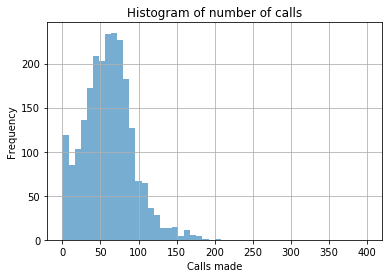

In [67]:
# plot a histogram of calls number. 
agg['calls_number'].hist(bins=50, range = [0, 400], alpha = 0.6)
# add title and axis names
plt.xlabel('Calls made')
plt.ylabel('Frequency')
plt.title("Histogram of number of calls");

In [68]:
# statistics of 'calls_number'
agg['calls_number'].describe()

count    2293.000000
mean       60.067597
std        32.402563
min         0.000000
25%        38.000000
50%        60.000000
75%        79.000000
max       205.000000
Name: calls_number, dtype: float64

The mean value is 60, the minimum and maximum values are 0 and 205 respectively. The histogram is skewed right, there are some outliers exists. 

#### Calls duration

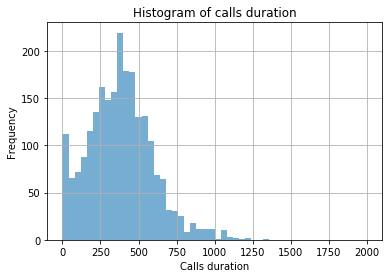

In [69]:
# plot a histogram of calls duration. 
agg['calls_duration'].hist(bins=50, range = [0, 2000], alpha = 0.6)
# add title and axis names
plt.xlabel('Calls duration')
plt.ylabel('Frequency')
plt.title("Histogram of calls duration");

In [70]:
agg['calls_duration'].describe()

count    2293.000000
mean      381.428696
std       210.719148
min         0.000000
25%       234.000000
50%       376.000000
75%       508.000000
max      1344.000000
Name: calls_duration, dtype: float64

The mean value is 381 minutes. The minimum and maximum value is 0 and 1344 minutes respectively. The histogram is skewed right, there are some outliers exist. 

#### Number of text messages

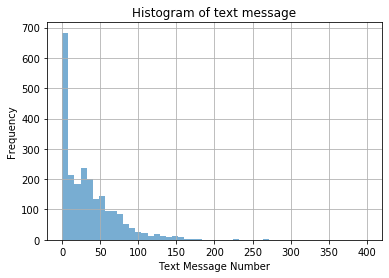

In [71]:
# plot a histogram of text message number. 
agg['message_number'].hist(bins=50, range = [0, 400], alpha = 0.6)
# add title and axis names
plt.xlabel('Text Message Number')
plt.ylabel('Frequency')
plt.title("Histogram of text message");

In [72]:
agg['message_number'].describe()

count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: message_number, dtype: float64

The mean value is 33 messages. The minimum and maximum values are 0 and 266 messages. The histogram is skewed right, meaning there are some outliers exist.

#### Internet Usage

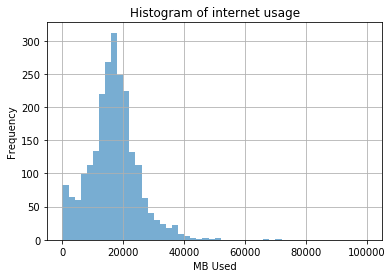

In [73]:
# plot a histogram of internet usage. 
agg['mb_used'].hist(bins = 50, range = [0, 100000], alpha = 0.6)
# add title and axis names
plt.xlabel('MB Used')
plt.ylabel('Frequency')
plt.title("Histogram of internet usage");

In [74]:
agg['mb_used'].describe()

count     2293.000000
mean     16744.712167
std       7959.515177
min          0.000000
25%      12217.000000
50%      16808.000000
75%      20977.000000
max      70866.000000
Name: mb_used, dtype: float64

The mean value is 16744 MB. The minimum and maximum values are 0 and 70866 MB respectively. The histogram is skewed right, meaning there are some outliers exist.

#### Plans

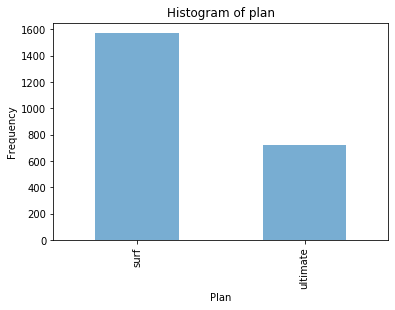

In [75]:
# Histogram for plans
agg['plan'].value_counts().plot(kind = 'bar', alpha = 0.6)
# add title and axis names
plt.xlabel('Plan')
plt.ylabel('Frequency')
plt.title("Histogram of plan");

We observed that surf plan as more users than ultimate plan. 

#### Message Cost

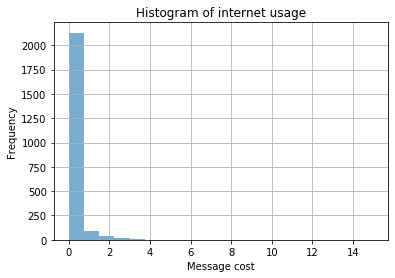

In [76]:
# plot a histogram of message cost. 
agg['message_cost'].hist(bins = 20, range = [0, 15], alpha = 0.6)
# add title and axis names
plt.xlabel('Message cost')
plt.ylabel('Frequency')
plt.title("Histogram of internet usage");

We observed that most message cost is between around 0 to 1. 

#### Call Cost

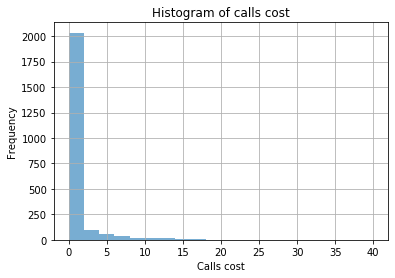

In [77]:
# plot a histogram of call cost. 
agg['call_cost'].hist(bins = 20, range = [0, 40], alpha = 0.6)
# add title and axis names
plt.xlabel('Calls cost')
plt.ylabel('Frequency')
plt.title("Histogram of calls cost");

We observed that most call cost is between 0 to 5. 

#### Internet cost

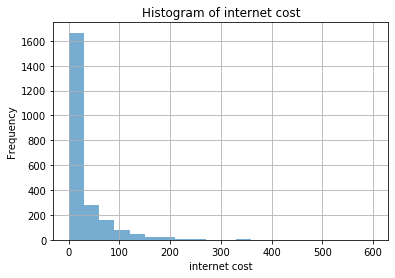

In [78]:
# plot a histogram of internet cost. 
agg['internet_cost'].hist(bins = 20, range = [0, 600], alpha = 0.6)
# add title and axis names
plt.xlabel('internet cost')
plt.ylabel('Frequency')
plt.title("Histogram of internet cost");

We observed that most internet usage is between 0 to 120 MB. 

#### Revenue

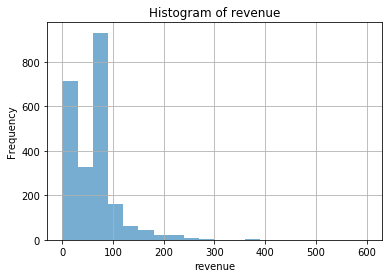

In [79]:
# plot a histogram of revenue. 
agg['revenue'].hist(bins = 20, range = [0, 600], alpha = 0.6)
# add title and axis names
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.title("Histogram of revenue");

In [80]:
agg['revenue'].describe()

count    2293.000000
mean       61.618055
std        45.291737
min        20.000000
25%        21.350000
50%        70.000000
75%        70.000000
max       579.030000
Name: revenue, dtype: float64

The mean value is 61. The minimum and maximum values are 20 and 579 respectively. The histogram is skewed right, meaning there are outliers exist.

### Detecting outliers and filtering data

In [81]:
# statistics of unfiltered data
agg[['calls_number', 'calls_duration', 'message_number', 'mb_used','message_cost', 'call_cost', 'internet_cost', 'revenue']].describe()



,calls_number,calls_duration,message_number,mb_used,message_cost,call_cost,internet_cost,revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,60.067597,381.428696,33.166594,16744.712167,0.144322,0.776180,24.997609,61.618055
std,32.402563,210.719148,34.070085,7959.515177,0.493515,2.421682,46.802355,45.291737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,38.000000,234.000000,3.000000,12217.000000,0.000000,0.000000,0.000000,21.350000
50%,60.000000,376.000000,26.000000,16808.000000,0.000000,0.000000,0.000000,70.000000
75%,79.000000,508.000000,51.000000,20977.000000,0.000000,0.000000,35.546875,70.000000
max,205.000000,1344.000000,266.000000,70866.000000,6.480000,25.320000,542.050781,579.030000


After analyzing the histograms and reviewing the statistics of each column, we found that `calls_number`, `calls_duration`, `message_number`, `mb_used`, `revenue` contains outliers. 

We will use IQR rule to detect outliers. First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.

In [82]:
cols = ['calls_number', 'calls_duration', 'message_number', 'mb_used', 'revenue']
Q1 = agg[cols].quantile(0.25)
Q3 = agg[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

calls_number        41.00
calls_duration     274.00
message_number      48.00
mb_used           8760.00
revenue             48.65
dtype: float64

The interquartile range of calls number is 41, calls duration is 274, message number is 48, internet usage is 8760MB, revenue is 48.65. 

In [83]:
# Outliers lower limit
lower_lim = Q1 - 1.5 * IQR
# Outliers upper limit
upper_lim = Q3 + 1.5 * IQR
print("Lower limits are\n", lower_lim)
print("Upper limits are\n", upper_lim)

Lower limits are
 calls_number      -23.500
calls_duration   -177.000
message_number    -69.000
mb_used          -923.000
revenue           -51.625
dtype: float64
Upper limits are
 calls_number        140.500
calls_duration      919.000
message_number      123.000
mb_used           34117.000
revenue             142.975
dtype: float64


We can see our lower limits of calls number is -23.5, calls duration is -177, message number is 69, internet usage is -923, and revenue is 51.625. Upper limits of calls number is 140.5 , calls duration is 919, message number is 123, internet usage is 34117MB, and revenue is 142.975. 

In [84]:
# Check our dataset before dropping outliers
print("Old Shape: ", agg.shape)

Old Shape:  (2293, 25)


Outliers are those data less than lower boundary and greater than upper boundary. 

In [85]:
# Check number of outliers
agg[((agg[cols] < lower_lim) |(agg[cols] > upper_lim)).any(axis=1)]

,user_id,month,calls_number,calls_duration,message_number,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn,messages_included,data_volume_per_month,minutes_included,monthly_pay,price_per_gb,price_per_msg,price_per_minute,message_cost,call_cost,internet_cost,revenue
9,1003,December,149.0,987.0,50.0,27019.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,14.61,113.857422,148.47
19,1006,December,9.0,52.0,139.0,32085.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01,0.00,0.00,9.331055,79.33
22,1007,December,87.0,547.0,50.0,29039.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,1.41,133.583984,154.99
24,1007,October,80.0,575.0,59.0,37858.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.27,2.25,219.707031,242.23
25,1007,September,63.0,350.0,47.0,28099.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,0.00,124.404297,144.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,1479,December,146.0,981.0,0.0,9772.0,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaN,No,50,15360,500,20,10,0.03,0.03,0.00,14.43,0.000000,34.43
2238,1490,August,80.0,460.0,0.0,39280.0,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN,No,1000,30720,3000,70,7,0.01,0.01,0.00,0.00,58.515625,128.52
2239,1490,December,50.0,328.0,0.0,46169.0,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN,No,1000,30720,3000,70,7,0.01,0.01,0.00,0.00,105.608398,175.61
2242,1490,October,43.0,220.0,0.0,36959.0,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN,No,1000,30720,3000,70,7,0.01,0.01,0.00,0.00,42.649414,112.65


We know we have 217 rows contains outliers. Let's drop them. 

In [86]:
# Dropping out the outliers
df_new = agg[~((agg[cols] < lower_lim) |(agg[cols] > upper_lim)).any(axis=1)]
# New dataset's shape
print("New Shape: ", df_new.shape) 

New Shape:  (2076, 25)


Our new data has 2076 rows.

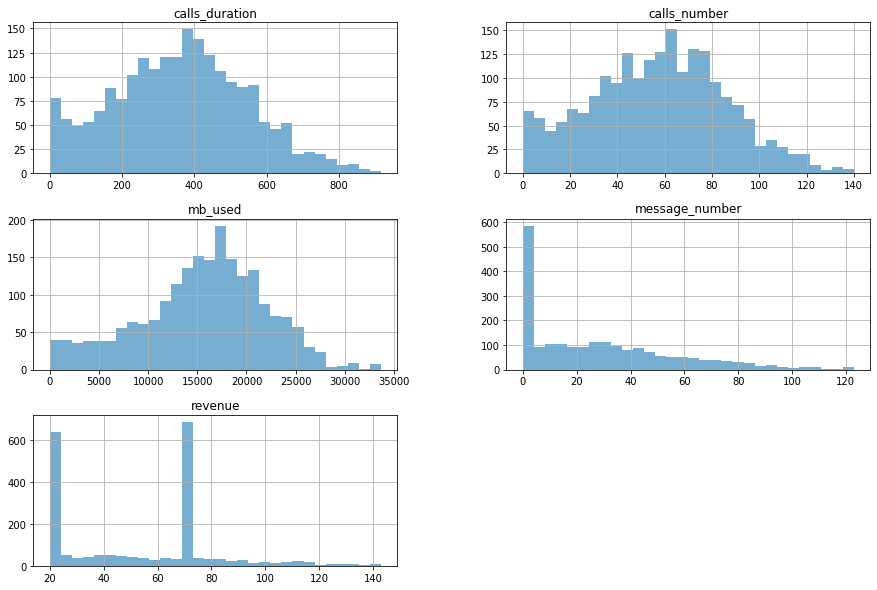

In [87]:
# New histograms after dropping outliers
df_new[cols].hist(bins = 30, figsize=(15, 10), alpha = 0.6);

In [88]:
# check out our statistics of columns after filtering outliers
df_new[cols].describe()

,calls_number,calls_duration,message_number,mb_used,revenue
count,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000
mean,57.154143,362.895954,28.796243,15564.906551,53.435154
std,28.727961,187.088649,27.886265,6472.718144,28.605280
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,37.000000,229.000000,3.000000,11824.000000,20.540000
50%,58.000000,367.000000,24.000000,16252.000000,63.430000
75%,77.000000,491.000000,46.000000,20015.000000,70.000000
max,140.000000,916.000000,123.000000,33656.000000,142.910000


### Conclusion

Our outliers (217 rows) have been removed, our new dataset has 2076 rows. Comparing the histograms, we observed that long 'tails' are not exist anymore, the distributions are almost normal distributions. Also, 50% percentiles are close to the mean value. We successfully removed our outliers from the dataset. We are ready to analyze which plan brings more revenue.

### Describe the customers' behavior

In [89]:
# select data with surf plan
df_surf = df_new[df_new['plan'] == 'surf']
# select data with ultimate plan
df_ult = df_new[df_new['plan'] == 'ultimate']

In [90]:
print('Surf plan user number is', df_surf.shape[0])
print('Ultimate plan user number is', df_ult.shape[0])

Surf plan user number is 1417
Ultimate plan user number is 659


Generally, `surf` plan has more users than `ultimate` plan.

#### Find the minutes the users of each plan require / month


In [91]:
# groupby plan by calls duration
df_new.groupby('plan')['calls_duration'].mean()

plan
surf        361.813691
ultimate    365.223065
Name: calls_duration, dtype: float64

We observed `ultimate` plan users have more minutes per month than `surf` plan users. 

In [92]:
# check statistics of minutes of surf plan
df_surf['calls_duration'].describe()

count    1417.000000
mean      361.813691
std       188.562996
min         0.000000
25%       229.000000
50%       364.000000
75%       498.000000
max       916.000000
Name: calls_duration, dtype: float64

In [93]:
# minutes variance of surf plan
df_surf['calls_duration'].var()

35556.003399997615

For `surf` plan users, the mean value is 361 minutes, minimum and maximum are 0 and 916 minutes. The variance is 35556. The standard deviation is 188.6. 

In [94]:
# check statistics of minutes of ultimate plan
df_ult['calls_duration'].describe()

count    659.000000
mean     365.223065
std      183.998803
min        0.000000
25%      230.000000
50%      372.000000
75%      480.500000
max      872.000000
Name: calls_duration, dtype: float64

In [95]:
# minutes variance of ultimate plan
df_ult['calls_duration'].var()

33855.55958876625

For `ultimate` plan, the mean value is 365 minutes, minimum and maximum are 0 and 872 minutes. The variance is 33855. The standard deviation is 184.0. 

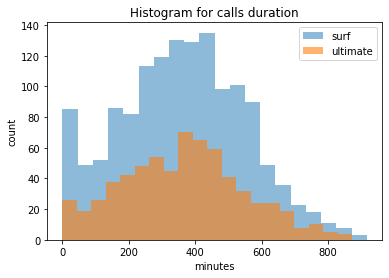

In [96]:
# plot a histogram for minutes of surf plan and ultimate plan
plt.hist(df_surf['calls_duration'], bins = 20, label = 'surf', alpha = 0.5)
plt.hist(df_ult['calls_duration'], bins = 20, label = 'ultimate', alpha = 0.6)
# add title and axis names
plt.xlabel('minutes')
plt.ylabel('count')
plt.legend(loc = 'upper right');
plt.title("Histogram for calls duration");

We observed from the histogram that `surf` plan users had users than `ultimate` plan users. The trend for both plan is similar, most users have around 400 minutes per month.

**Conclusion**

We observed that `ultimate` plan users have longer average minutes than `surf` plan users, but `surf` plan has more users than `ultimate` plan.

#### Find the texts the users of each plan require / month

In [97]:
# groupby plan by number of messages
df_new.groupby('plan')['message_number'].mean()

plan
surf        26.976711
ultimate    32.708649
Name: message_number, dtype: float64

We observed `ultimate` plan users have more text messages per month than `surf` plan users. 

In [98]:
# check statistics of text messages of surf plan
df_surf['message_number'].describe()

count    1417.000000
mean       26.976711
std        26.946801
min         0.000000
25%         2.000000
50%        21.000000
75%        42.000000
max       123.000000
Name: message_number, dtype: float64

In [99]:
# text message variance of surf plan
df_surf['message_number'].var()

726.1301069738328

For `surf` plan users, the mean value is 26 text messages, minimum and maximum are 0 and 123 text messages. The variance is 726. The standard deviation is 26.9.

In [100]:
# check statistics of text messages of ultimate plan
df_ult['message_number'].describe()

count    659.000000
mean      32.708649
std       29.448633
min        0.000000
25%        5.000000
50%       28.000000
75%       54.000000
max      123.000000
Name: message_number, dtype: float64

In [101]:
# text message variance of ultimate plan
df_ult['message_number'].var()

867.2219767447225

For `ultimate` plan users, the mean value is 32 text messages, minimum and maximum are 0 and 123 text messages. The variance is 867. The standard deviation is 29.4.

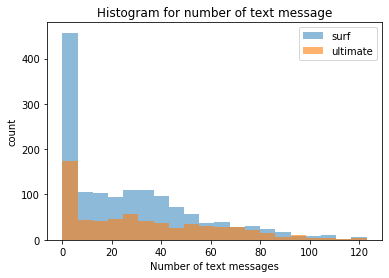

In [102]:
# plot a histogram for text message numbers of surf plan and ultimate plan
plt.hist(df_surf['message_number'], bins = 20, label = 'surf', alpha = 0.5)
plt.hist(df_ult['message_number'], bins = 20, label = 'ultimate', alpha = 0.6)
# add title and axis names
plt.xlabel('Number of text messages')
plt.ylabel('count')
plt.legend(loc = 'upper right');
plt.title("Histogram for number of text message");

We observed from the histogram that `surf` plan had more users than `ultimate` plan users. The trend for both plan is similar, most users have less than 40 text messages per month.

**Conclusion**

We observed that `ultimate` plan users have more average text messages than `surf` plan users, but `surf` plan has more users than `ultimate` plan.

#### Find the volumn of data the users of each plan require / month

In [103]:
# groupby plan by internet usage
df_new.groupby('plan')['mb_used'].mean()

plan
surf        15315.652082
ultimate    16100.860395
Name: mb_used, dtype: float64

We observed `ultimate` plan users have more internet usage per month than `surf` plan users.

In [104]:
# check statistics of internet usage of surf plan
df_surf['mb_used'].describe()

count     1417.000000
mean     15315.652082
std       6361.400732
min          0.000000
25%      11749.000000
50%      16242.000000
75%      19918.000000
max      27946.000000
Name: mb_used, dtype: float64

In [105]:
# internet usage variance of surf plan
df_surf['mb_used'].var()

40467419.275053926

For `surf` plan users, the mean value is 15315 MB, minimum and maximum are 0 and 27946 MB. The variance is 40467419. The standard deviation is 6361.

In [106]:
# check statistics of internet usage of ultimate plan
df_ult['mb_used'].describe()

count      659.000000
mean     16100.860395
std       6679.275450
min          0.000000
25%      12329.500000
50%      16285.000000
75%      20091.500000
max      33656.000000
Name: mb_used, dtype: float64

In [107]:
# internet usage variance of surf plan
df_ult['mb_used'].var()

44612720.53671169

For `ultimate` plan users, the mean value is 16100 MB, minimum and maximum are 0 and 33656 MB. The variance is 44612721. The standard deviation is 6679.

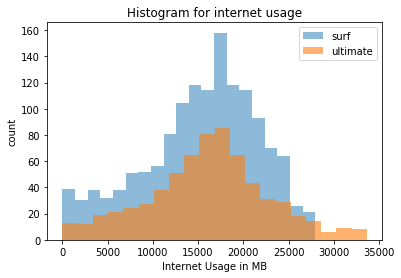

In [108]:
# plot a histogram for internet usage of surf plan and ultimate plan
plt.hist(df_surf['mb_used'], bins = 20, label = 'surf', alpha = 0.5)
plt.hist(df_ult['mb_used'], bins = 20, label = 'ultimate', alpha = 0.6)
# add title and axis names
plt.xlabel('Internet Usage in MB')
plt.ylabel('count')
plt.legend(loc = 'upper right');
plt.title("Histogram for internet usage");

We observed from the histogram that `surf` plan users had more users than `ultimate` plan. The trend for both plan is similar, most users have less than 27000 MB per month. `Ultimate` plans have more users with large internet usage. 

**Conclusion**

We observed that `ultimate` plan users have more average internet usage than `surf` plan users, but `surf` plan has more users than `ultimate` plan. `Ultimate` plans have more users with large internet usage.

### Conclusion

We detected and removed outliers from our dataset, and we found `surf` plan has more users than ultimate plan. We determined that `ultimate` plan users on the average use 365 minutes per month, sent about 34 messages, and use 16100 MB of data per month. We also determined that `surf` plan users on the average  use 362 minutes per month, sent about 26 messages, and use 15316 MB of data per month. On average `ultimate` plan users spend more time on calling, text more messages, and require more internet data than surf plan users.

## Test the hypotheses

### The average revenue from users of Ultimate and Surf calling plans differs.

In [109]:
# calculate average revenue of ultimate and surf plan
print('The average revenue for surf plan users is $',(df_surf['revenue'].sum()/len(df_surf)).round(2))
print('The average revenue for surf plan users is $',(df_ult['revenue'].sum()/len(df_ult)).round(2))

The average revenue for surf plan users is $ 45.64
The average revenue for surf plan users is $ 70.2


We know the average revenue for `Surf` plan users is \$45.64, and for `Ultimate` plan users is \$70.2. We want to test whether the difference is significant. The null hypothesis is there is no average revenue difference between `Ultimate` and `Surf` calling plans, the alternative hypothesis is the average revenue from users of `Ultimate` and `Surf` calling plans differs. We use significant level 0.05.

* $H_0$: There is no average revenue difference between `Ultimate` and `Surf` calling plans.
* $H_0$: The average revenue from users of `Ultimate` and `Surf` calling plans differs
* $\alpha$ = 0.05
* If the p-value < $\alpha$, we reject the null hypothesis, otherwise, we fail to reject the null hypothesis. 

In [110]:
# Testing a hypothesis about the means of two statistical populations based on samples taken from them
surf = df_surf['revenue']
ult = df_ult['revenue']

alpha = 0.05

results = st.ttest_ind(surf, ult, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis')

p-value:  1.5368083854994892e-80
We reject the null hypothesis.


**Conclusion**: Based on our testing, we reject the null hypothesis. That is, the average revenue from users of `Ultimate` and `Surf` calling plans differs

### The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [111]:
# calculate average revenue of ultimate and surf plan users from NY-Nj area and not from Ny-Nj area.
ny_nj = df_new.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
not_ny_nj = df_new.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']

print('The average revenue for users from NY-NJ area is $', ny_nj.mean().round(2))
print('The average revenue for users no from other regions is $', not_ny_nj.mean().round(2))

The average revenue for users from NY-NJ area is $ 49.44
The average revenue for users no from other regions is $ 54.25


We know the average revenue for users from NY-NJ area is $\$$49.44, and for users from other regions is \$54.25. We want to test whether the difference is significant. The null hypothesis is there is no average revenue difference from users in NY-NJ area and users from other regions. The alternative hypothesis is the average revenue from users in NY-NJ area is different from that of the users from other regions. We use significant level 0.05. 
* $H_0$: There is no average revenue difference from users in NY-NJ area and users from other regions.
* $H_1$: The average revenue from users in NY-NJ area is different from that of the users from other regions.
* $\alpha$ = 0.05
* If the p-value < $\alpha$, we reject the null hypothesis, otherwise, we fail to reject the null hypothesis. 

In [112]:
ny_nj = df_new.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
not_ny_nj = df_new.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']

alpha = 0.05

results = st.ttest_ind(ny_nj, not_ny_nj, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis')

p-value:  0.004047086637237114
We reject the null hypothesis.


**Conclusion**: Based on our testing, we reject the null hypothesis. That is, the average revenue from users in NY-NJ area is different from that of the users from other regions.

## Overall Conclusion

By looking at the general information of the data, we identified some problems with datatypes and coverted them to the right datatypes. We identified some missing values in `churn_date` column from `user` dataset, and we added a new column `churn` indicating if `churn_date` is missing, than the user stpped using the service, otherwise the user is still using the service. 

We calculated the number of calls made and minutes used per month, the minimum time spend is 0 minutes, and the maximum time spend is 1355 minutes in total. The mean value is 387 minutes total per month. We also calculated the number of text messages per month, the minimum number is 1 and the maximum number is 266. The mean value is 42 text messages. Then we calculated the volume of data per month,the minimum internet usage is 92MB per month and the maximum internet usage is 70866MB per month. The mean value is 16862MB per month. Lastly, we calculated the monthly revenue per user. 

By plotting histograms, we identified there were outliers existing in `calls_number`, `calls_duration`, `message_number`, `mb_used`, and `revenue`. We used IQR rule to detect outliers, and we dropped outliers  which were those less than lower boundary and greater than upper boundary.

We determined that on average `Ultimate` plan users spend more time on calling, text more messages, and require more internet data than `Surf` plan users, while `Surf` plan has more users than `Ultimate` plan. That is, `Surf` plan users made more calls, text message more, and use internet more than `Ultimate` plan users.

From the hypothesis test, we concluded that the average revenue from users of `Ultimate` and `Surf` calling plans differs, and the average revenue from users in NY-NJ area is different from that of the users from other regions.

We can conclude that `Ultimate` plan is more profitable than `Surf` plan. To make our analysis more accurate, we can study more by grouping clients' `age` or where they live (`city`). 